In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [20]:

df = pd.read_csv('C:\\Users\\julio\\FreeWays\\operation\\models\\csvs\\ynb.csv')
df.head()

,south_1,south_2,north_1,north_2,east_1,east_2,west_1,west_2,datetime,intersection,day,day_name
0,1,2,3,2,7,9,8,5,2024-04-01 00:00:00,Yonge and Bloor,0,Monday
1,5,2,5,2,4,5,3,6,2024-04-01 00:15:00,Yonge and Bloor,0,Monday
2,1,1,2,4,4,3,6,4,2024-04-01 00:30:00,Yonge and Bloor,0,Monday
3,4,1,1,1,7,4,5,5,2024-04-01 00:45:00,Yonge and Bloor,0,Monday
4,2,4,1,1,5,6,5,4,2024-04-01 01:00:00,Yonge and Bloor,0,Monday


In [22]:
df.describe()

,south_1,south_2,north_1,north_2,east_1,east_2,west_1,west_2,day
count,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000
mean,22.341548,21.986116,22.479347,21.881638,24.936827,24.807706,24.535925,24.843457,2.833044
std,14.583880,14.647637,14.599670,14.545076,14.656489,14.664198,14.532083,14.495502,2.034485
min,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,0.000000
25%,9.000000,5.000000,8.000000,5.000000,8.000000,10.000000,9.000000,8.000000,1.000000
50%,24.000000,24.000000,24.000000,24.000000,27.000000,26.000000,26.000000,27.000000,3.000000
75%,30.000000,28.000000,30.000000,28.000000,31.000000,33.000000,32.000000,31.000000,5.000000
max,57.000000,53.000000,56.000000,53.000000,56.000000,58.000000,57.000000,56.000000,6.000000


In [23]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   south_1       2881 non-null   int64         
 1   south_2       2881 non-null   int64         
 2   north_1       2881 non-null   int64         
 3   north_2       2881 non-null   int64         
 4   east_1        2881 non-null   int64         
 5   east_2        2881 non-null   int64         
 6   west_1        2881 non-null   int64         
 7   west_2        2881 non-null   int64         
 8   datetime      2881 non-null   datetime64[ns]
 9   intersection  2881 non-null   object        
 10  day           2881 non-null   int64         
 11  day_name      2881 non-null   object        
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 270.2+ KB


In [25]:
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

In [26]:
df.head()

,south_1,south_2,north_1,north_2,east_1,east_2,west_1,west_2,datetime,intersection,day,day_name,hour,minute
0,1,2,3,2,7,9,8,5,2024-04-01 00:00:00,Yonge and Bloor,0,Monday,0,0
1,5,2,5,2,4,5,3,6,2024-04-01 00:15:00,Yonge and Bloor,0,Monday,0,15
2,1,1,2,4,4,3,6,4,2024-04-01 00:30:00,Yonge and Bloor,0,Monday,0,30
3,4,1,1,1,7,4,5,5,2024-04-01 00:45:00,Yonge and Bloor,0,Monday,0,45
4,2,4,1,1,5,6,5,4,2024-04-01 01:00:00,Yonge and Bloor,0,Monday,1,0


array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

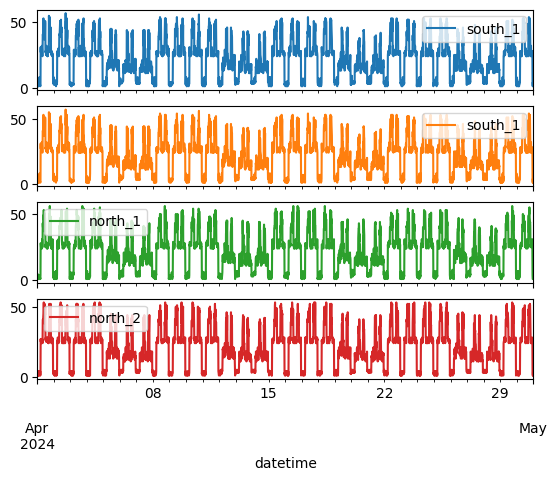

In [27]:
df.set_index('datetime')[['south_1', 'south_1', 'north_1', 'north_2']].plot(subplots=True)

In [28]:
df1 = df[['south_1', 'south_2', 'north_1', 'north_2', 'east_1', 'east_2', 'west_1', 'west_2']].rolling(window=80).mean()
df1['datetime'] = df['datetime']

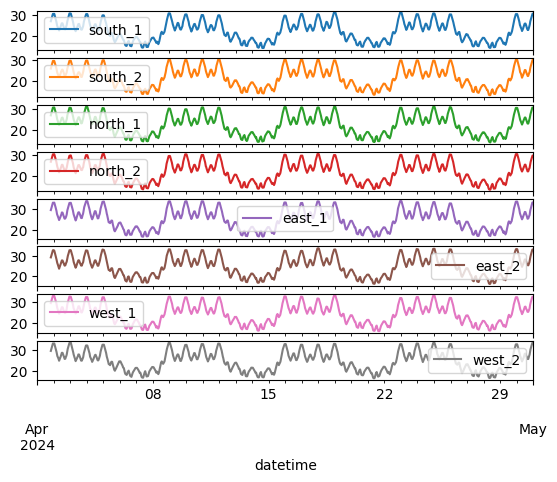

In [29]:
df1.set_index('datetime')[['south_1', 'south_2', 'north_1', 'north_2', 'east_1', 'east_2', 'west_1', 'west_2']].plot(subplots=True)
plt.show()

In [30]:
df = df[['south_1', 'south_2', 'north_1', 'north_2', 'east_1', 'east_2', 'west_1', 'west_2', 'datetime', 'day', 'hour', 'minute']]

In [31]:
df.set_index(df['datetime'], inplace=True)

In [32]:
df.drop('datetime', inplace=True, axis=1)

In [93]:
df.head(1000)

,south_1,south_2,north_1,north_2,east_1,east_2,west_1,west_2,day,hour,minute
datetime,,,,,,,,,,,
2024-04-01 00:00:00,1,2,3,2,7,9,8,5,0,0,0
2024-04-01 00:15:00,5,2,5,2,4,5,3,6,0,0,15
2024-04-01 00:30:00,1,1,2,4,4,3,6,4,0,0,30
2024-04-01 00:45:00,4,1,1,1,7,4,5,5,0,0,45
2024-04-01 01:00:00,2,4,1,1,5,6,5,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-11 08:45:00,40,40,43,39,43,41,43,44,3,8,45
2024-04-11 09:00:00,47,41,43,38,48,42,48,46,3,9,0
2024-04-11 09:15:00,47,46,41,42,46,44,51,42,3,9,15


In [34]:
input_features = df[['day', 'hour', 'minute']].values
traffic_counts = df[['east_1', 'east_2', 'north_1', 'north_2', 'south_1', 'south_2', 'west_1', 'west_2']].values


In [35]:
data_combined = np.hstack((input_features, traffic_counts))

In [36]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :3])  # Only take the day, hour, minute columns as input
        y.append(data[i + seq_length, 3:])    # Take the traffic counts as target
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(data_combined, seq_length)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [38]:
X_train[0]

array([[ 0,  0,  0],
       [ 0,  0, 15],
       [ 0,  0, 30],
       [ 0,  0, 45],
       [ 0,  1,  0]], dtype=int64)

In [39]:
y_train[0]

array([4, 7, 2, 3, 4, 2, 5, 4], dtype=int64)

In [40]:
# scaler = StandardScaler()
# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()
# X_train_scaled = scaler.fit_transform(X_train.reshape(-1, len(features) - 3)).reshape(X_train.shape)
# X_test_scaled = scaler.transform(X_test.reshape(-1, len(features) - 3)).reshape(X_test.shape)

In [41]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(y_train.shape[1]))  # Number of output neurons should be the number of traffic count columns

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

c:\Users\julio\FreeWays\Env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100)            │        40,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,008 (203.16 KB)

 Trainable params: 52,008 (203.16 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100
72/72 - 3s - 47ms/step - loss: 559.5785 - mae: 19.3334 - val_loss: 330.1246 - val_mae: 14.5647
Epoch 2/100
72/72 - 0s - 3ms/step - loss: 301.4842 - mae: 14.3367 - val_loss: 227.8903 - val_mae: 12.2783
Epoch 3/100
72/72 - 0s - 3ms/step - loss: 234.5002 - mae: 12.7730 - val_loss: 201.7792 - val_mae: 11.7868
Epoch 4/100
72/72 - 0s - 3ms/step - loss: 173.3205 - mae: 10.2279 - val_loss: 139.4506 - val_mae: 8.9382
Epoch 5/100
72/72 - 0s - 3ms/step - loss: 129.4021 - mae: 8.4099 - val_loss: 99.2214 - val_mae: 7.2751
Epoch 6/100
72/72 - 0s - 3ms/step - loss: 99.4010 - mae: 7.2219 - val_loss: 101.2240 - val_mae: 7.5361
Epoch 7/100
72/72 - 0s - 3ms/step - loss: 92.3315 - mae: 7.1835 - val_loss: 85.9286 - val_mae: 7.0840
Epoch 8/100
72/72 - 0s - 3ms/step - loss: 80.8330 - mae: 6.8436 - val_loss: 85.7060 - val_mae: 7.2216
Epoch 9/100
72/72 - 0s - 3ms/step - loss: 77.7825 - mae: 6.7541 - val_loss: 73.7785 - val_mae: 6.7187
Epoch 10/100
72/72 - 0s - 3ms/step - loss: 69.8296 - mae: 6.5118

In [43]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0248 - mae: 2.1216 
Test Loss: [8.722169876098633, 2.2073071002960205]


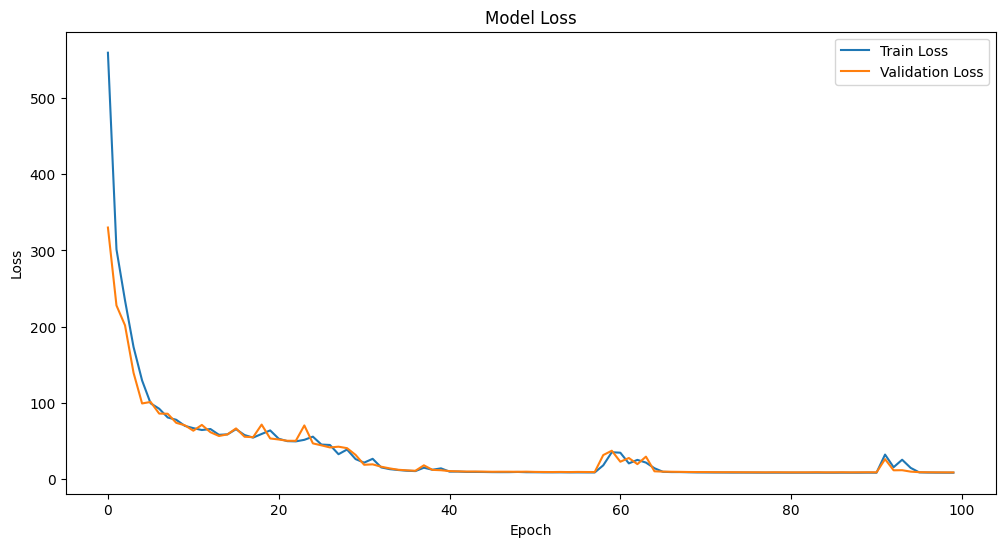

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

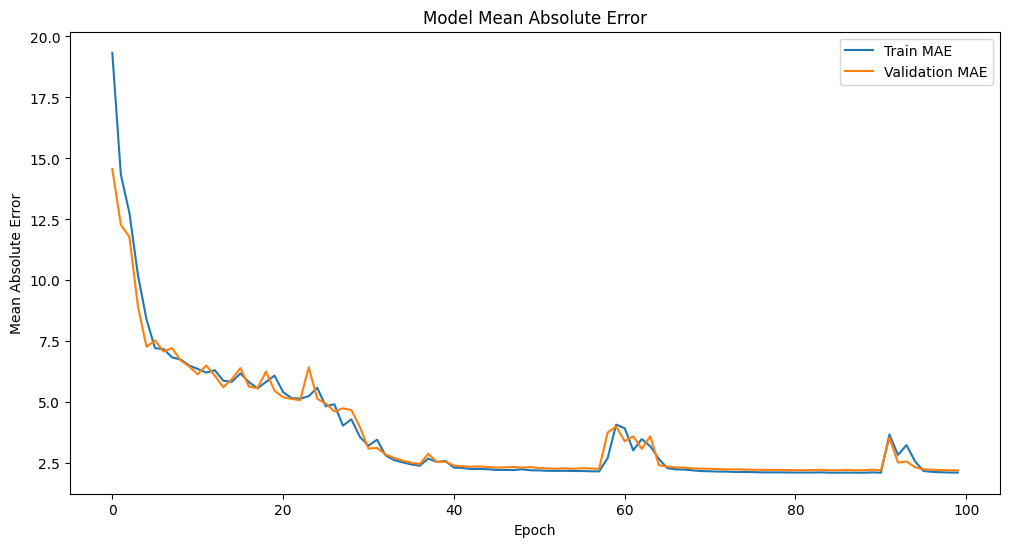

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.show()


In [46]:
sample_idx = 3

sample_X = X_test[sample_idx]
sample_y_true = y_test[sample_idx]

sample_X = sample_X.reshape(1, sample_X.shape[0], sample_X.shape[1])
sample_y_pred = model.predict(sample_X)

print("True Values:")
print(sample_y_true)
print("Predicted Values:")
print(sample_y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
True Values:
[6 6 4 1 4 1 5 7]
Predicted Values:
[[5.814117  5.457672  2.980599  2.7012644 3.1003435 2.6647959 5.5873594
  5.7204723]]


In [47]:
manual_input = [[0, 10, 30],
              [0, 10, 45],
              [0, 11, 0],
              [ 0, 11, 15],
              [0, 11, 30]]
input_data = np.array(manual_input)

In [48]:
manual_input_sequence = input_data.reshape((1, seq_length, 3))
predicted_traffic_counts = model.predict(manual_input_sequence)

print("Predicted traffic counts:", predicted_traffic_counts)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Predicted traffic counts: [[48.035458 47.524826 44.977024 44.625736 45.17467  45.05562  46.57843
  46.903324]]


In [89]:
model.save("2-intersection.keras")


In [90]:
loaded_model = keras.models.load_model("2-intersection.keras")


c:\Users\julio\FreeWays\Env\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [92]:
loaded_model.predict(manual_input_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[48.035458, 47.524826, 44.977024, 44.625736, 45.17467 , 45.05562 ,
        46.57843 , 46.903324]], dtype=float32)